In [1]:
from sqlalchemy import MetaData
meta = MetaData()

In [6]:
print(MetaData).

<class 'sqlalchemy.sql.schema.MetaData'>


In [2]:
import sqlalchemy
import pandas as pd

from sqlalchemy import create_engine

engine = sqlalchemy.create_engine('sqlite:///divyang_2.db', echo=True)


#Importing training dataset
df_train = pd.read_csv('train.csv')

#Importing test dataset
df_test = pd.read_csv('test.csv')

#Importing ideal functions
df_ideal = pd.read_csv('ideal.csv')

#Loading dataset to database
df_train.to_sql('train', engine)
df_test.to_sql('test data', engine)


2022-06-13 21:18:47,753 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("train")
2022-06-13 21:18:47,754 INFO sqlalchemy.engine.Engine [raw sql] ()


ValueError: Table 'train' already exists.

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$                                                          $
+                        y1 <-> y37                        +
$                                                          $
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.523e+05
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:38:27   Log-Likelihood:                -78.820
No. Observations:                 400   AIC:                             161.6
Df Residuals:                     398   BIC:                             169.6
Df Model:                           1                         

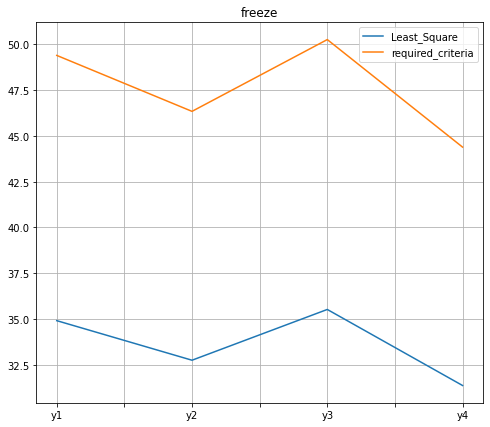

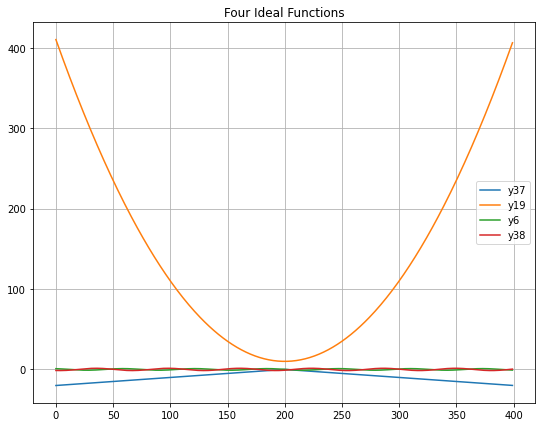

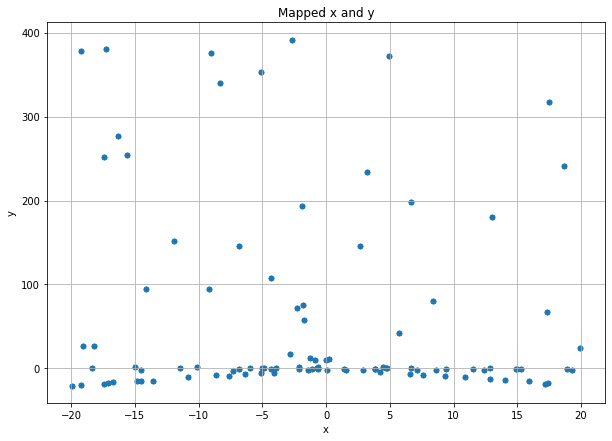

In [2]:
'''#Import the required libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

'''ideal_fun is the Ideal function from the csv file'''

ideal_fun = pd.read_csv('ideal.csv')
ideal_fun
ideal_sorted = ideal_fun.drop(['x'], axis=1)
ideal_fun

'''Importing the train data from the csv files provided by the tutor'''
train_data = pd.read_csv('train.csv')
train_data

'''train_sorted will be the dataset with x-column dropped'''
train_sorted = train_data.drop(['x'], axis=1)
train_data.head()

# the requirement for the task is to choose some ideal functions for 
#train_data based on 
#how they minimize the sum of all the Least-square. (_y_deviations_).

'''## we Calculate the least-Squares (_y_deviations_)'''

Least_Square = pd.DataFrame({
    train__label : {
        funct__label: ((train_data - ideal_fun)**2).sum()
        for funct__label, ideal_fun in ideal_sorted.iteritems()
    } for train__label, train_data in train_sorted.iteritems()
})

'''Here we created a Dataframe for Least_Square and we used iteritems() function of the pandas Library
 to iterate over every item. To be noted that here the x-column was already dropped so the dataframe only contained
 the y-values of the datasets'''

Least_Square = Least_Square[(Least_Square == Least_Square.min()).any(axis=1)]
Least_Square[(Least_Square != Least_Square.min())] = np.nan

'''
above line of code is a Dataframe internal conditional statement
and the python interpreter evaluates it as a boolean expression.
'''

Least_Square

#In the code cell above, we are only interested in the Least-Square that have the minimum values(as stated in the requirement).
#Other values that are larger than minimum, are simply set to NaN(not a number value).

'''#Let's gather the Largest deviation between each train_data and the corresponding the ideal_data
#we will do it with the required criteria side by side'''

freeze = pd.DataFrame({
    'Least_Square': Least_Square.min(),
    'required_criteria': Least_Square.min() * 2 ** 0.5,
    'funct__label': Least_Square.idxmin(axis=0)
})

freeze

'''freeze is the limit
# Retrieve the largest deviations between each training dataset and
# the ideal function chosen for it 
# multiplied by factor sqrt(2):'''

freeze.plot(title='freeze', grid=True, figsize=(8,7))

#Now we will import our test dataset 
#so that we can see how our findings so far is mapping over it
test_data = pd.read_csv('test.csv')
test__sorted = test_data.drop(['x'], axis=1)
test__sorted.head()

'''#let's select the relevant ideal functions
#according to the task, four ideal functions need to be taken'''

Golden_functions = ideal_fun[['x'] + list(freeze['funct__label'])]
Golden_functions
#golden functions refer to the four ideal functions

#we should visualize our `'''Golden_function'''` to see
#what we finally reached at.

Golden_functions.drop(['x'], axis=1).plot(figsize=(9,7), title="Four Ideal Functions", grid=True)

#The criterion for mapping the individual test case to the four ideal functions is that the existing maximum 

#deviation of the calculated regression does not exceed the largest deviation between training dataset and 
#the ideal function  chosen for it by more than factor sqrt(2).
 
#Map each test record to an ideal function with respect to the criterion:


mapped_functions = pd.DataFrame([
    {
        'function' : (
            label if error.values[0] < freeze[(freeze['funct__label'] == label)].required_criteria[0]
            else 'unknown'
        ),
        'del_y': error.values[0],
        'approach': freeze[(freeze['funct__label'] == label)].required_criteria[0],
        'x': row[0],
        'y': row[1]
    } for row in test_data.itertuples(index=False)
    for label, error in (
        Golden_functions[Golden_functions.x == row[0]].drop(['x'], axis=1) - row[1]
    ).abs().iteritems() 
])

'''
above lines of code includes a Dataframe internal conditional statement
and the python interpreter interpret it as a boolean expression.
'''

mapped_functions[mapped_functions.function != 'unknown']

mapped_functions.plot.scatter(x='x', y='y',title='Mapped x and y', grid=True, figsize=(10,7))

'''Optional task for essay: evaluate regression models from the mapping:'''

for train_set, function in zip(freeze.index, freeze.funct__label):
    destination = sm.OLS(train_data[train_set],
                         sm.add_constant(ideal_fun[function])).fit()
    print('$' * 60 + '\n$' + ' '*58 + '$')
    print('+' + f"{train_set} <-> {function}".center(58) + '+\n$' + ' '*58 + '$')
    print('$' * 60 + '\n')
    print(destination.summary())



$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$                                                          $
+                        y1 <-> y37                        +
$                                                          $
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.523e+05
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:56:06   Log-Likelihood:                -78.820
No. Observations:                 400   AIC:                             161.6
Df Residuals:                     398   BIC:                             169.6
Df Model:                           1                         

(<AxesSubplot:title={'center':'Train data'}>,
 <AxesSubplot:title={'center':'Test data'}>,
 <AxesSubplot:title={'center':'Ideal Functions'}>)

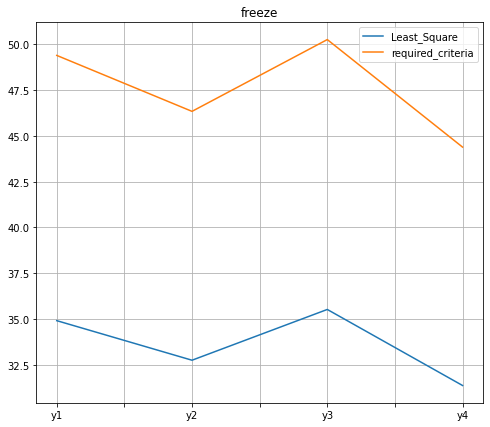

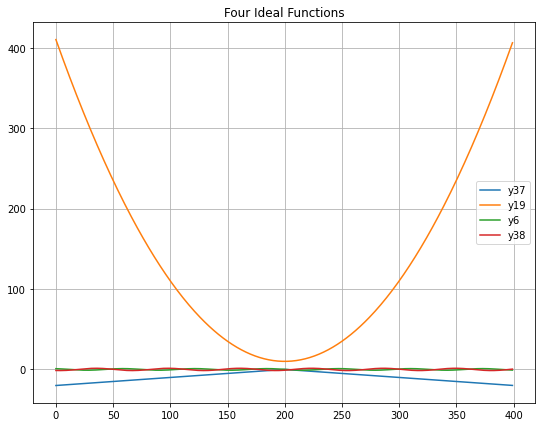

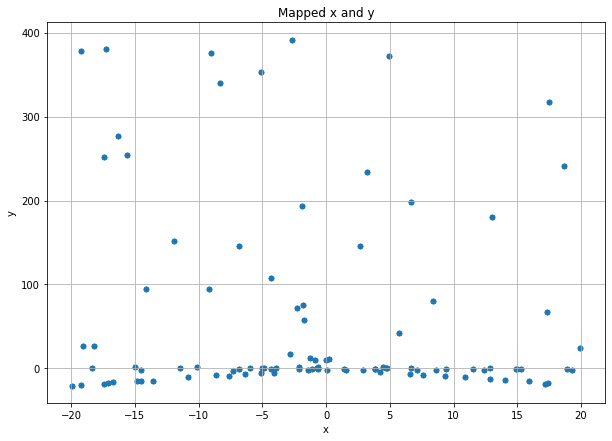

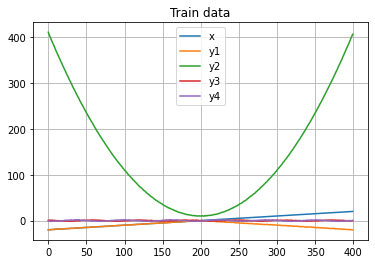

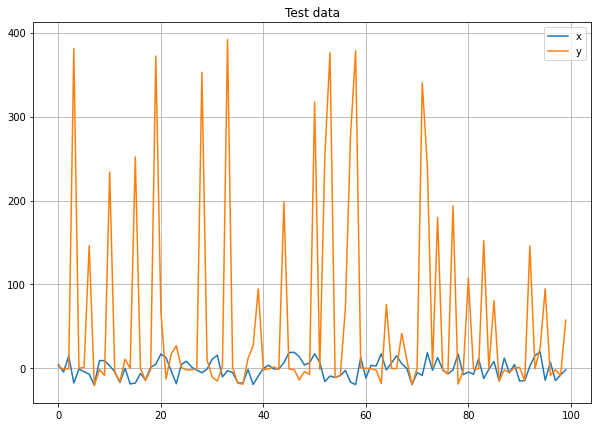

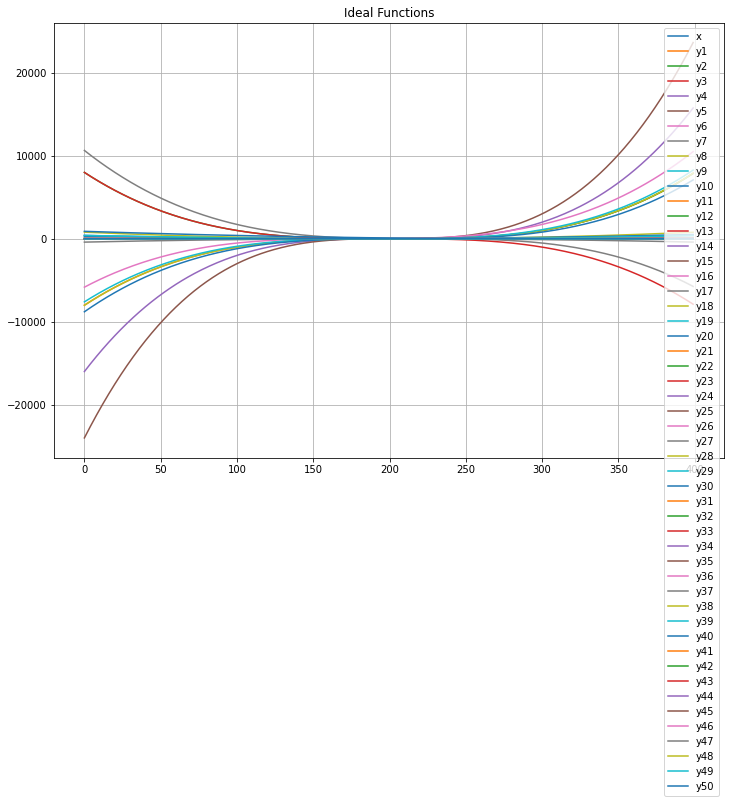

In [5]:
'''#Import the required libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

'''ideal_fun is the Ideal function from the csv file'''

ideal_fun = pd.read_csv('ideal.csv')
ideal_fun
ideal_sorted = ideal_fun.drop(['x'], axis=1)
ideal_fun

'''Importing the train data from the csv files provided by the tutor'''
train_data = pd.read_csv('train.csv')
train_data

'''train_sorted will be the dataset with x-column dropped'''
train_sorted = train_data.drop(['x'], axis=1)
train_data.head()

# the requirement for the task is to choose some ideal functions for 
#train_data based on 
#how they minimize the sum of all the Least-square. (_y_deviations_).

'''## we Calculate the least-Squares (_y_deviations_)'''

Least_Square = pd.DataFrame({
    train__label : {
        funct__label: ((train_data - ideal_fun)**2).sum()
        for funct__label, ideal_fun in ideal_sorted.iteritems()
    } for train__label, train_data in train_sorted.iteritems()
})

'''Here we created a Dataframe for Least_Square and we used iteritems() function of the pandas Library
 to iterate over every item. To be noted that here the x-column was already dropped so the dataframe only contained
 the y-values of the datasets'''

Least_Square = Least_Square[(Least_Square == Least_Square.min()).any(axis=1)]
Least_Square[(Least_Square != Least_Square.min())] = np.nan

'''
above line of code is a Dataframe internal conditional statement
and the python interpreter evaluates it as a boolean expression.
'''

Least_Square

'''In the code cell above, we are only interested in the Least-Square that have the minimum values(as stated in the requirement).
Other values that are larger than minimum, are simply set to NaN(not a number value).'''

'''#Let's gather the Largest deviation between each train_data and the corresponding the ideal_data
#we will do it with the required criteria side by side'''

freeze = pd.DataFrame({
    'Least_Square': Least_Square.min(),
    'required_criteria': Least_Square.min() * 2 ** 0.5,
    'funct__label': Least_Square.idxmin(axis=0)
})

freeze

'''freeze is the limit
# Retrieve the largest deviations between each training dataset and
# the ideal function chosen for it 
# multiplied by factor sqrt(2):'''

freeze.plot(title='freeze', grid=True, figsize=(8,7))

#Now we will import our test dataset 
#so that we can see how our findings so far is mapping over it
test_data = pd.read_csv('test.csv')
test__sorted = test_data.drop(['x'], axis=1)
test__sorted.head()

'''#let's select the relevant ideal functions
#according to the task, four ideal functions need to be taken'''

Golden_functions = ideal_fun[['x'] + list(freeze['funct__label'])]
Golden_functions
#golden functions refer to the four ideal functions

#we should visualize our `'''Golden_function'''` to see
#what we finally reached at.

Golden_functions.drop(['x'], axis=1).plot(figsize=(9,7), title="Four Ideal Functions", grid=True)

#The criterion for mapping the individual test case to the four ideal functions is that the existing maximum 

#deviation of the calculated regression does not exceed the largest deviation between training dataset and 
#the ideal function  chosen for it by more than factor sqrt(2).
 
#Map each test record to an ideal function with respect to the criterion:


mapped_functions = pd.DataFrame([
    {
        'function' : (
            label if error.values[0] < freeze[(freeze['funct__label'] == label)].required_criteria[0]
            else 'unknown'
        ),
        'del_y': error.values[0],
        'approach': freeze[(freeze['funct__label'] == label)].required_criteria[0],
        'x': row[0],
        'y': row[1]
    } for row in test_data.itertuples(index=False)
    for label, error in (
        Golden_functions[Golden_functions.x == row[0]].drop(['x'], axis=1) - row[1]
    ).abs().iteritems() 
])

'''
above lines of code includes a Dataframe internal conditional statement
and the python interpreter interpret it as a boolean expression.
'''

mapped_functions[mapped_functions.function != 'unknown']

mapped_functions.plot.scatter(x='x', y='y',title='Mapped x and y', grid=True, figsize=(10,7))

'''Optional task for essay: evaluate regression models from the mapping:'''

for train_set, function in zip(freeze.index, freeze.funct__label):
    destination = sm.OLS(train_data[train_set],
                         sm.add_constant(ideal_fun[function])).fit()
    print('$' * 60 + '\n$' + ' '*58 + '$')
    print('+' + f"{train_set} <-> {function}".center(58) + '+\n$' + ' '*58 + '$')
    print('$' * 60 + '\n')
    print(destination.summary())
	

#now the database part of the task
import sqlalchemy
import pandas as pd


import sqlalchemy
import pandas as pd

from sqlalchemy import create_engine

engine = sqlalchemy.create_engine('sqlite:///divyang_newrr.db', echo=True)


#Importing training dataset
df_train = pd.read_csv('train.csv')

#Importing test dataset
df_test = pd.read_csv('test.csv')

#Importing ideal functions
df_ideal = pd.read_csv('ideal.csv')

#Loading dataset to database
df_train.to_sql('train', engine)
df_test.to_sql('test data', engine)

#loading the Four ideal Functions to the databse
Golden_functions.to_sql('four ideal functions', engine)

#loading the least square functions to the database
Least_Square.to_sql('Least Square function', engine)


#now we will use the OOP (Object Oriented Programming) paradigm for explicitly use the class and define user defined exception.

"""
This code cell contains classes to define users exceptions
"""


class DonotHaveColumnError(Exception):
    """
    error to show that the respective dataset doesn't have some specific column name doesn't
    """

    def __init__(self, column_name, file_source):
        self.column_name = column_name
        self.file_source = file_source

    def __str__(self):
        return "Error!!! Data from {0} doesn't have column name {1}. Please check your source files".format(
            self.file_source,
            self.column_name)


class EmptyDataError(Exception):
    """
    error to show that dataset is empty
    """

    def __init__(self, file_source):
        self.file_source = file_source

    def __str__(self):
        return "Error!!! Data from {0} is empty. Please Check Your Source Files".format(self.file_source)


class NotAppropriateLengthError(Exception):
    """
    error to show that the length of given object is wrong
    """

    def __init__(self, obj, obj_len, len_appropriate):
        self.obj = obj
        self.obj_len = obj_len
        self.len_appropriate = len_appropriate

    def __str__(self):
        return "Error!!! The raw in given object {0} is inappropriate and equal to {1}. It should be equal to {2}" \
            .format(self.obj, self.obj_len, self.len_appropriate)


class NotAppropriateColumnError(Exception):
    """
    error to show that the given respective dataframes do not have column col_name
    """

    def __init__(self, col_name, dataframes):
        self.col_name = col_name
        self.dataframes = dataframes

    def __str__(self):
        return "Error!!! The  given dataframes {0} and {1} do not have column {2}. Please Check Your Source Files" \
            .format(self.dataframes[0].head(3), self.dataframes[1].head(3), self.col_name)


class NotAppropriateDataFormatError(Exception):
    """
    error to show that in the given respective dataframe all values are not numbers
    """

    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __str__(self):
        return "Error!!! In the given dataframe {0} all values are not numbers. Please Check Your Source Files" \
            .format(self.dataframe.head(3))


class NotAppropriateVariableFormatError(Exception):
    """
    error to show that the given variable is not dataframe
    """

    def __init__(self, var):
        self.var = var

    def __str__(self):
        return "Error!!! In the given variable {0} is not dataframe. Please Check Your Source Files" \
            .format(self.var)


class NotAppropriateDatabaseTypeError(Exception):
    """
    the non-dataframe variable will be shown by the error
    """

    def __init__(self, allowed_dbtypes):
        self.allowed_dbtypes = allowed_dbtypes

    def __str__(self):
        return "Error!!! dbType is not found in db_ENGINE. Allowed lists of DBTypes is {0}. Please check" \
            .format(self.allowed_dbtypes)
			

#visualize all the initial datasets
train_data.plot(grid=True, title='Train data'), test_data.plot(grid=True, title='Test data', figsize=(10,7)), ideal_fun.plot(grid=True, figsize=(12,8), title='Ideal Functions')